# Test our Ecohydrology module

This notebook is to test that importing and using our implementation of the Ecohydrology model works. 

In [1]:
from ecohydr_mod import EcoHyd
import numpy as np
import pandas as pd

In [2]:
def get_yearly_temp(csv_path, num_years):
    df = pd.read_csv(csv_path)
    df.dt = pd.to_datetime(df.dt)
    avg_temp_per_year = []
    max_temp_per_year = []
    min_temp_per_year = []
    for year in range(0, num_years):
        earliest_yr = df.iloc[0, 0].year
        year = year + earliest_yr
        if len(df.loc[(df.dt.dt.year == year), :]) > 365:
            avg_temp_per_year.append(df.loc[(df.dt.dt.year == year), 'AverageTemperature'].iloc[:-1].tolist())
            max_temp_per_year.append(df.loc[(df.dt.dt.year == year), 'MaxTemperature'].iloc[:-1].tolist())
            min_temp_per_year.append(df.loc[(df.dt.dt.year == year), 'MinTemperature'].iloc[:-1].tolist())
        else:
            avg_temp_per_year.append(df.loc[(df.dt.dt.year == year), 'AverageTemperature'].tolist())
            max_temp_per_year.append(df.loc[(df.dt.dt.year == year), 'MaxTemperature'].tolist())
            min_temp_per_year.append(df.loc[(df.dt.dt.year == year), 'MinTemperature'].tolist())
    
    return avg_temp_per_year, max_temp_per_year, min_temp_per_year

In [3]:
#get input temperature data
avg, maxi, mini = get_yearly_temp('new_temp_data.csv', 4)

In [4]:
len(avg[0])

365

In [5]:
WSA_array = np.zeros((51,51))
# Set 20 random values to 1
indices_to_set = np.random.choice(range(51 * 51), size=20, replace=False)
row_indices, col_indices = np.unravel_index(indices_to_set, (51, 51))
WSA_array[row_indices, col_indices] = int(1)

Ecohyd_model = EcoHyd(20, 26, 23)

In [6]:
import matplotlib.pyplot as plt

In [53]:
biomass_harvest, SM_canic_end = Ecohyd_model.stepper(WSA_array, avg[0], maxi[0], mini[0])

364
3.9972602739727083
soil moisture sat.: [ 0.16337664  0.16336736  0.16335848 ...,  0.17267337  0.17268092
  0.17268879]
live biomass:  [ 45.85573076  45.86884115  45.88141045 ...,  10.9092332   10.90556839
  10.90175557]
ET:  [ 4.95690385  4.95873493  4.96049    ...,  3.6179886   3.61659901
  3.61515439]
ET30:  [ 4.95690385  4.95873493  4.96049    ...,  3.6179886   3.61659901
  3.61515439]
PFT:  [0 0 0 ..., 0 0 0]
0
4.000000000000106
soil moisture sat.: [ 0.15168859  0.15167897  0.15166976 ...,  0.16129211  0.16130141
  0.16131108]
live biomass:  [ 0.  0.  0. ...,  0.  0.  0.]
ET:  [ 5.04819152  5.05005632  5.05184371 ...,  3.68774781  3.68633142
  3.68485895]
ET30:  [ 5.04819152  5.05005632  5.05184371 ...,  3.68774781  3.68633142
  3.68485895]
PFT:  [3 3 3 ..., 3 3 3]
1
4.002739726027503
soil moisture sat.: [ 0.14356994  0.14356132  0.14355307 ...,  0.15242838  0.15243796
  0.15244792]
live biomass:  [ 0.  0.  0. ...,  0.  0.  0.]
ET:  [ 4.97682978  4.97866822  4.98043034 ...,  3.

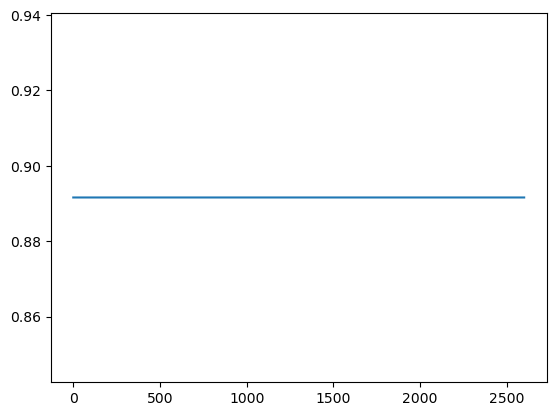

In [54]:
plt.plot(Ecohyd_model.mg.at_cell['rainfall__daily_depth'])

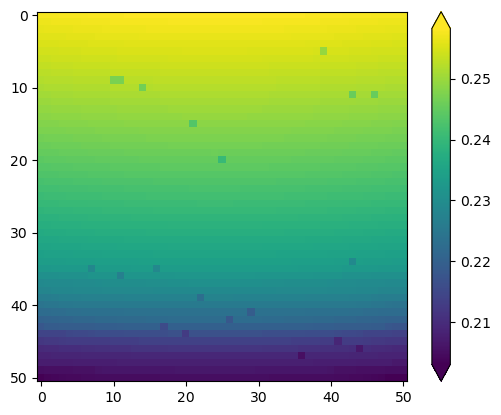

In [55]:
plt.imshow(np.reshape(Ecohyd_model.mg.at_cell['surface__evapotranspiration'], (51,51)))
plt.colorbar(extend = 'both')

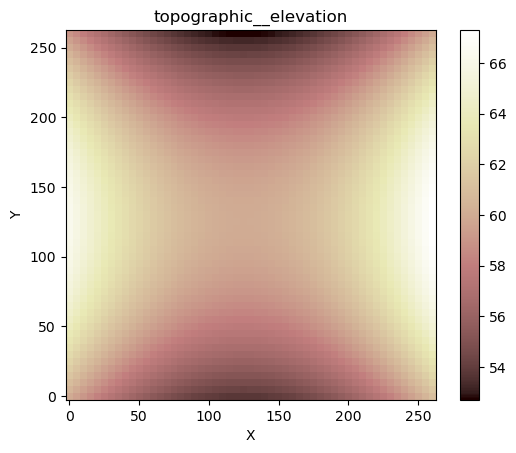

In [56]:
from landlab.plot.imshow import imshow_grid_at_node
#N.B. the Landlab user guide tells you to import the wrong component here

plt.figure('Elevations from the field')  # new fig, with a name
imshow_grid_at_node(Ecohyd_model.mg, 'topographic__elevation') 
plt.show()

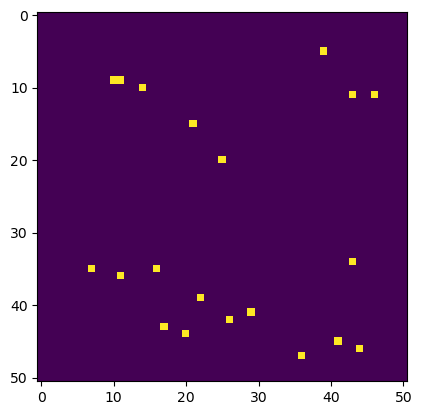

In [57]:
plt.imshow(WSA_array)

N.B the following images are all flipped upside-down because np.reshape assumes by default that the origin is in the top left, not the bottom left.

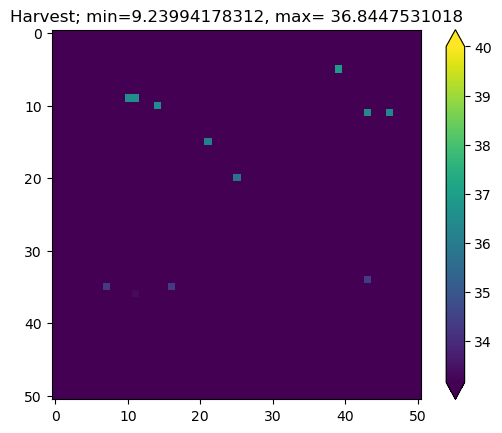

In [58]:
plt.imshow(np.reshape(biomass_harvest, (51,51)), vmin=40)
hmin = np.min(biomass_harvest)
hmax = np.max(biomass_harvest)
plt.title('Harvest; min='+str(hmin)+', max= ' + str(hmax))

plt.colorbar(extend = 'both')

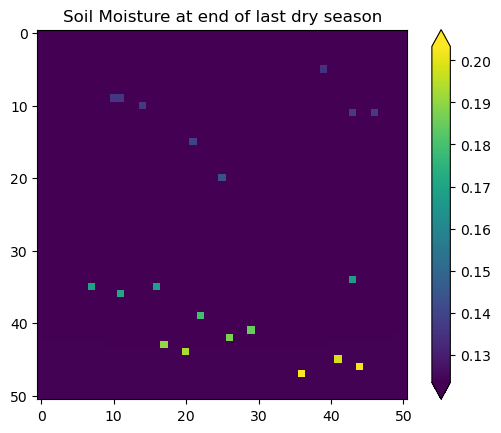

In [64]:
plt.imshow(np.reshape(SM_canic_end, (51,51)))
plt.title('Soil Moisture at end of last dry season')
plt.colorbar(extend = 'both')

Why does WSA decrease soil moisture? A bit sus... Maybe there is still enough rainfall that the cover crop interception leads to less SM.

Almost more importantly though, we need to figure out what causes the weird artifact at the bottom of the plot (i.e., the North of the domain). Why is soil moisture there so much lower? As-is, this will dominate any potential effects from WSA.

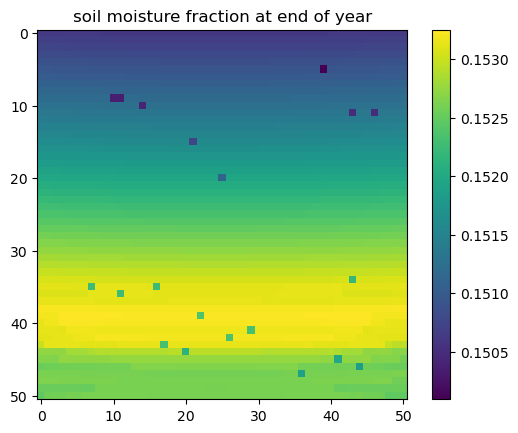

In [65]:
SM = np.reshape(Ecohyd_model.mg.at_cell['soil_moisture__saturation_fraction'], (51,51))
plt.imshow(SM)
plt.title('soil moisture fraction at end of year')
plt.colorbar()

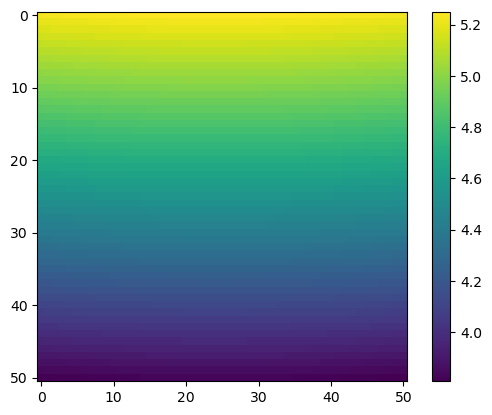

In [61]:
ET = np.reshape(Ecohyd_model.mg.at_cell['surface__potential_evapotranspiration_rate'], (51,51))
plt.imshow(ET)
plt.colorbar()

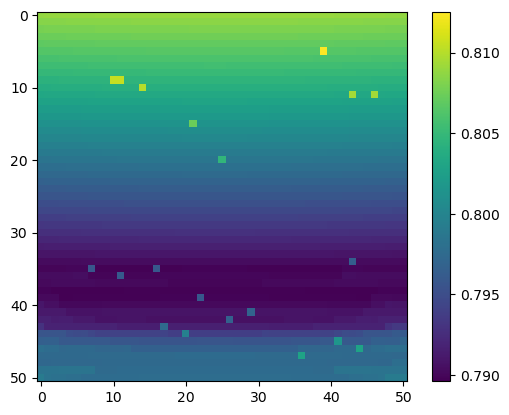

In [62]:
WS = np.reshape(Ecohyd_model.mg.at_cell['vegetation__water_stress'], (51,51))
plt.imshow(WS)
plt.colorbar()

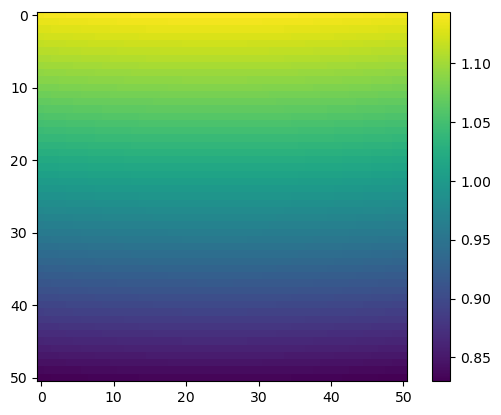

In [63]:
Rad_slope = np.reshape(Ecohyd_model.mg.at_cell['radiation__ratio_to_flat_surface'], (51,51))
plt.imshow(Rad_slope)
plt.colorbar()